<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [26]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


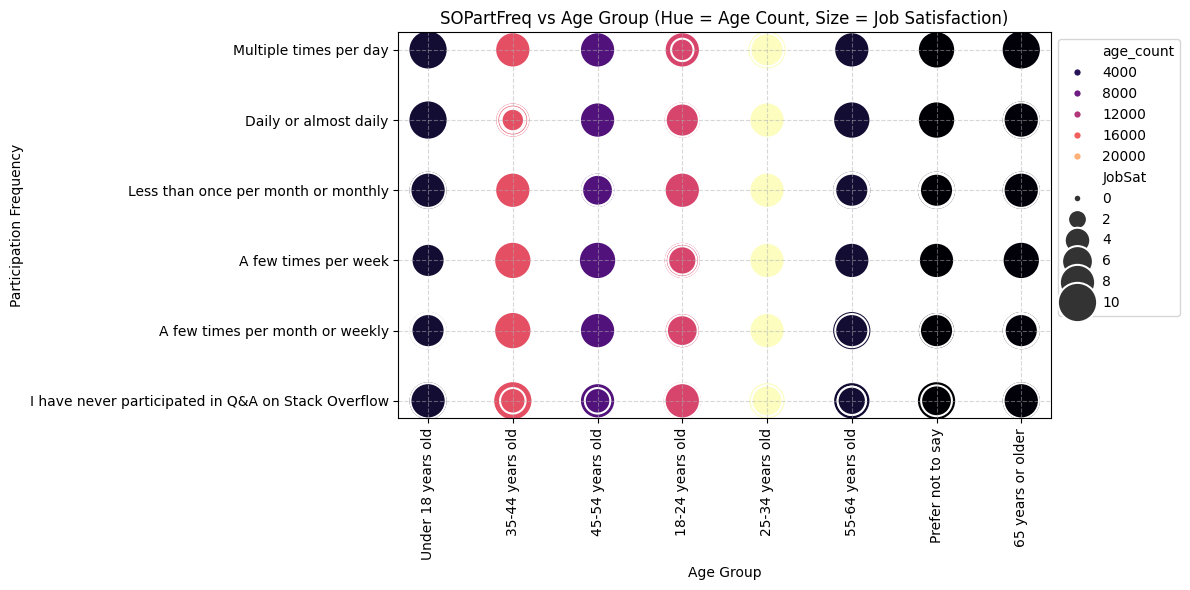

In [3]:
##Write your code here
# Count age frequencies
age_count = df['Age'].value_counts().to_dict()

# Map counts back to the dataframe
df['age_count'] = df['Age'].map(age_count)

# Optional: sort age categories if categorical
# age_order = sorted(df['Age'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else int(x.rstrip('+')))

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)

sns.scatterplot(
    data=df,
    x='Age',
    y='SOPartFreq',
    hue='age_count',
    size='JobSat',
    sizes=(30, 800),
    palette='magma',
    hue_norm=(min(age_count.values()), max(age_count.values()))
)

plt.xlabel("Age Group")
plt.ylabel("Participation Frequency")
plt.title("SOPartFreq vs Age Group (Hue = Age Count, Size = Job Satisfaction)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [4]:
print(df['Age'].unique())
print(df['JobSat'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
[nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


In [5]:
age_map  = {
    'Under 18 years old': 15,
    '35-44 years old': 30,
    '45-54 years old': 40,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '55-64 years old': 60,
    'Prefer not to say': 0,
    '65 years or older': 70
}
df['Age_num'] = df['Age'].map(age_map)

In [6]:
df_clean = df['JobSat'].dropna()
df_clean.unique()

array([ 8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [7]:
# ConvertedCompYearly contaons outliers. So, Applying IQR method to detect and remove outliers
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
df_clean.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'age_count', 'Age_num'],
      dtype='object', length=116)

Text(0, 0.5, 'Job Satisfaction')

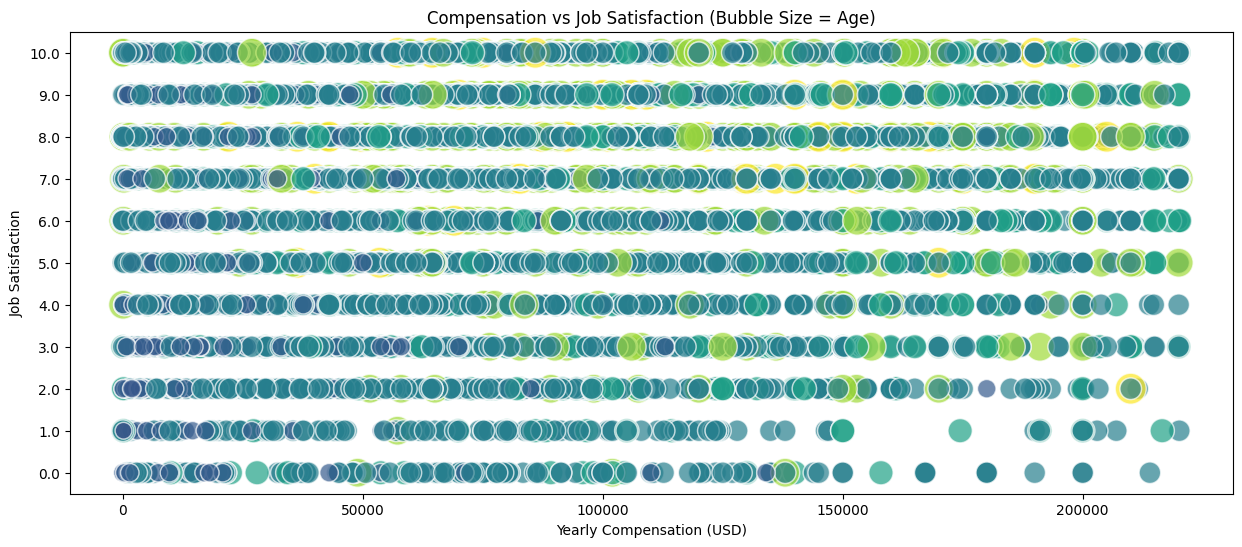

In [8]:
plt.figure(figsize=(15,6))
bubble_plot = sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSat',
    size='Age_num',
    sizes=(50, 500),
    hue='Age_num',
    palette='viridis',
    legend=False,
    alpha=0.7)
# Customize plot
job_sat_levels = sorted(df_clean['JobSat'].dropna().unique())
bubble_plot.set_yticks(range(len(job_sat_levels)))
bubble_plot.set_yticklabels(job_sat_levels)

plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



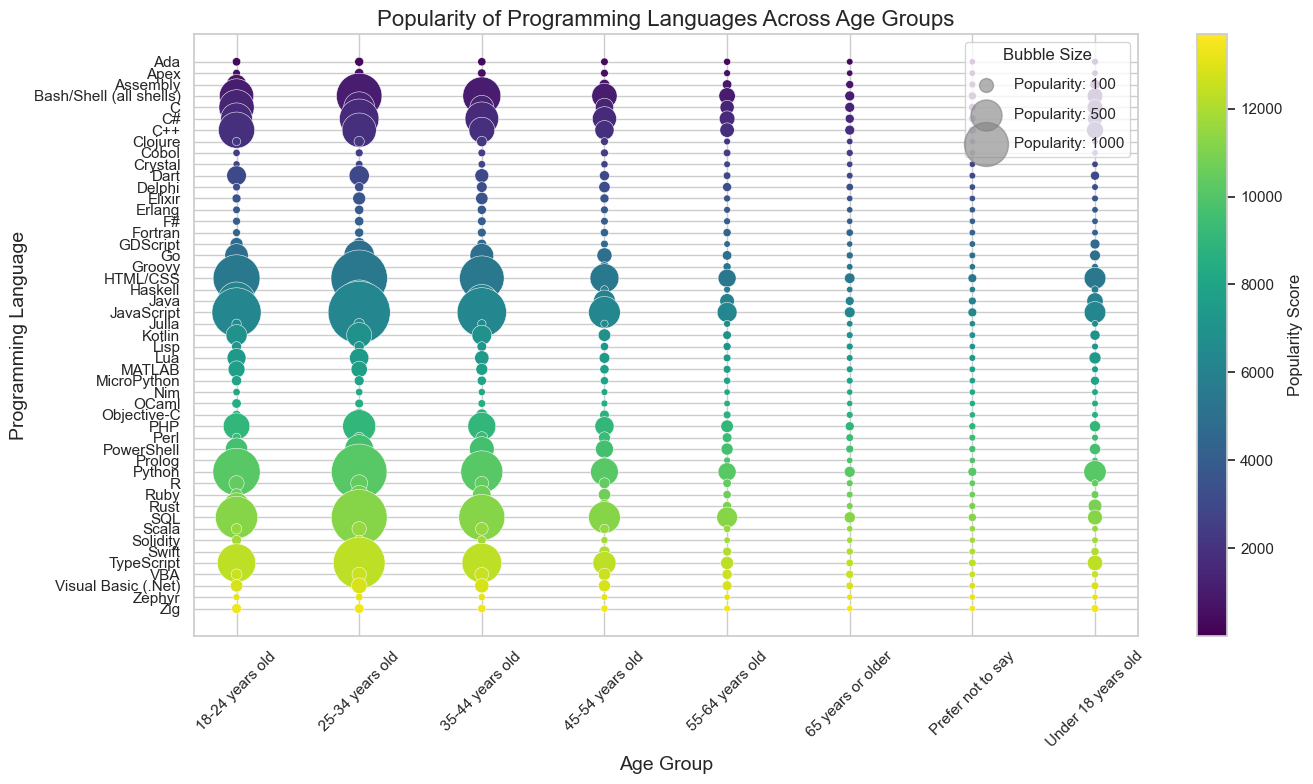

In [15]:
#Write your code here
# Set seaborn style
sns.set(style="whitegrid")

# df = pd.read_csv('survey_data_1.csv')

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Explode the LanguageHaveWorkedWith column to separate multiple languages per respondent
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

# Group by Age and Language and count occurrences
language_counts = df_exploded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')


# Create bubble plot
fig, ax  = plt.subplots(figsize=(14, 8))
sns.scatterplot(
    data=language_counts,
    x='Age',
    y='LanguageHaveWorkedWith',
    size='Count',
    sizes=(20, 2000),
    hue='LanguageHaveWorkedWith',
    legend=False,
    palette='viridis',ax=ax
)

# Bubble size legend
for size in [100, 500, 1000]:
    ax.scatter([], [], s=size, c='gray', alpha=0.6, label=f'Popularity: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size')

# Colorbar for hue
norm = plt.Normalize(language_counts['Count'].min(), language_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Popularity Score')

plt.title('Popularity of Programming Languages Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Programming Language', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [16]:
##Write your code here
sns.set(style="whitegrid")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['JobSat', 'DatabaseWantToWorkWith'])

# Explode the LanguageHaveWorkedWith column to separate multiple languages per respondent
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')

# Group by Age and Language and count occurrences
language_counts = df_exploded.groupby(['JobSat', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

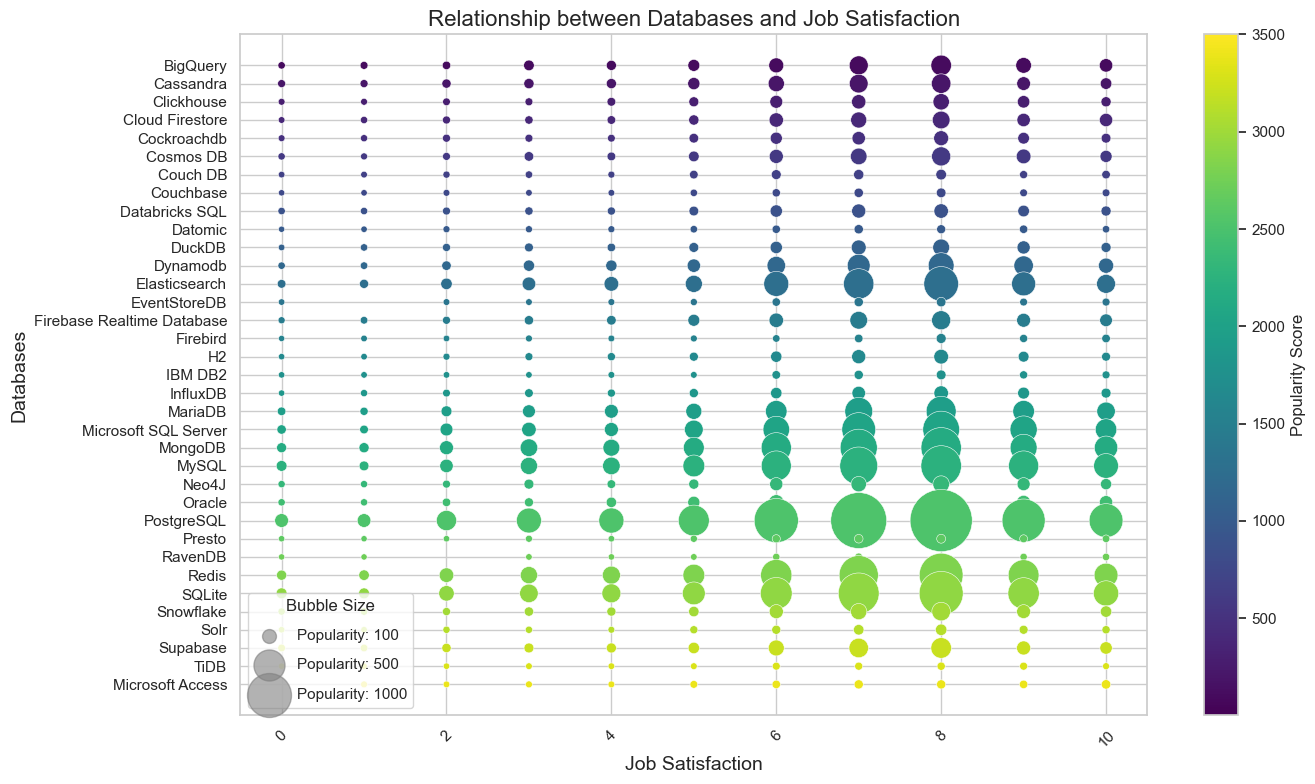

In [17]:
# Create bubble plot
fig, ax  = plt.subplots(figsize=(14, 8))
sns.scatterplot(
    data=language_counts,
    x='JobSat',
    y='DatabaseWantToWorkWith',
    size='Count',
    sizes=(20, 2000),
    hue='DatabaseWantToWorkWith',
    legend=False,
    palette='viridis',ax=ax
)

# Bubble size legend
for size in [100, 500, 1000]:
    ax.scatter([], [], s=size, c='gray', alpha=0.6, label=f'Popularity: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size')

# Colorbar for hue
norm = plt.Normalize(language_counts['Count'].min(), language_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Popularity Score')

plt.title('Relationship between Databases and Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Databases', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [18]:
##Write your code here
# Drop missing values
df = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Remove outliers from raw compensation
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

In [19]:
# Mapping compensation to samller ranges to reduce cluttering
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 300000]
labels = ['<20k', '20–40k', '40–60k', '60–80k', '80–100k', '100–150k', '150–200k', '200–300k']
df['CompRange'] = pd.cut(df['ConvertedCompYearly'], bins=bins, labels=labels)


In [20]:
# Since, one respondent contains multiple dev roles
df = df.assign(DevType=df['DevType'].str.split(';'))
df = df.explode('DevType')
df['DevType'] = df['DevType'].str.strip()


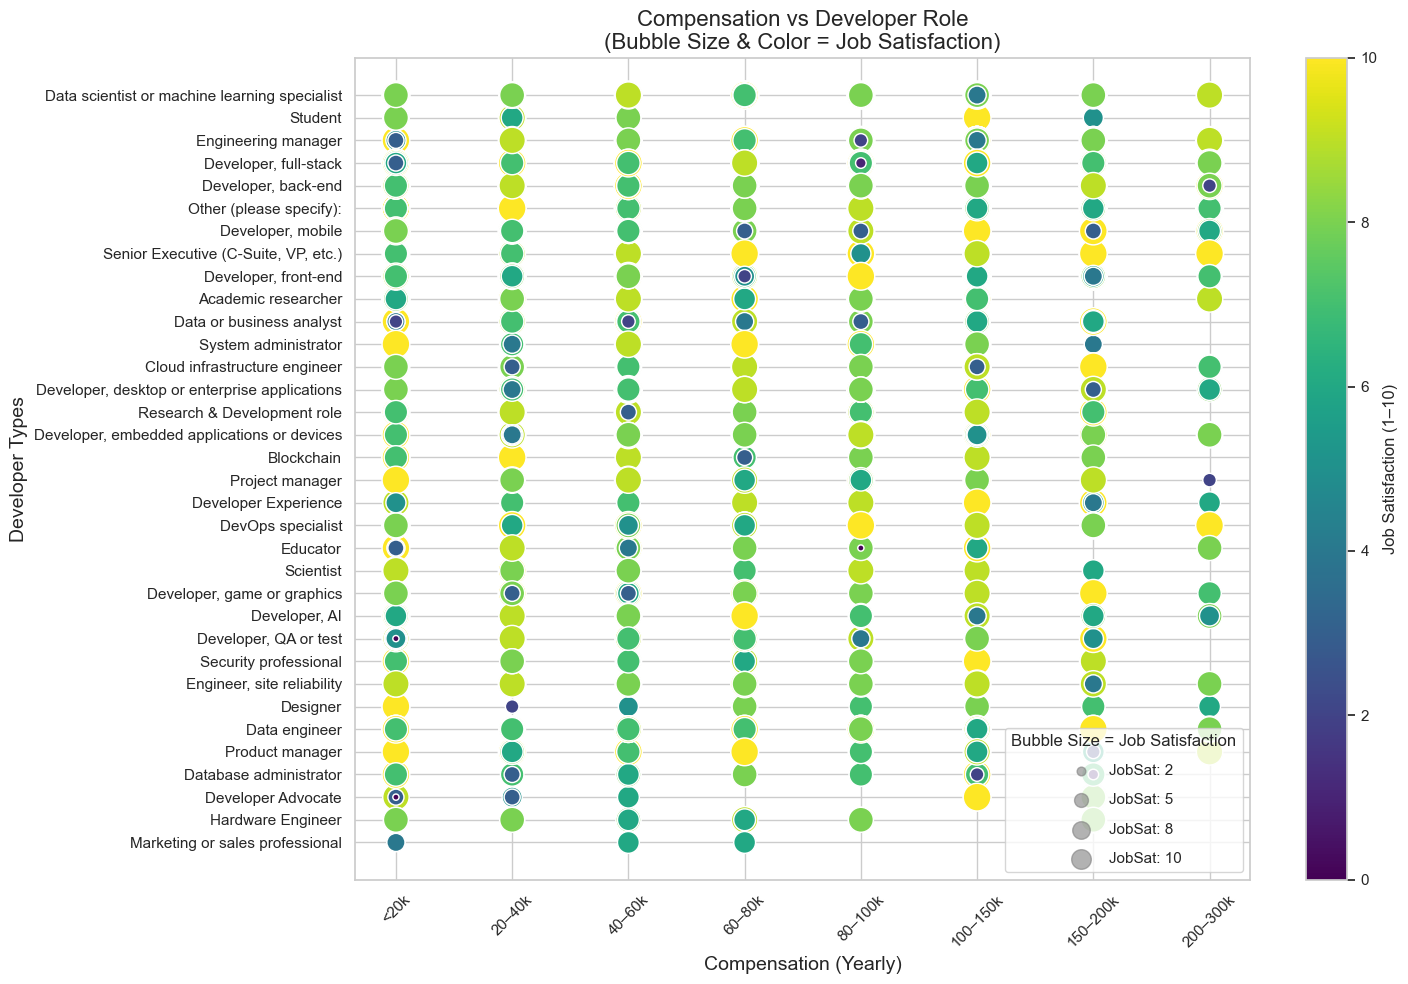

In [21]:
# Plot
fig, ax = plt.subplots(figsize=(15, 10))
scatter = sns.scatterplot(
    data=df,
    x='CompRange',
    y='DevType',
    size='JobSat',
    sizes=(20, 400),
    hue='JobSat',
    palette='viridis',
    legend=False,
    ax=ax
)

# Bubble size legend
for size in [2, 5, 8, 10]:
    ax.scatter([], [], s=size * 20, c='gray', alpha=0.6, label=f'JobSat: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size = Job Satisfaction')

# Colorbar for JobSat
norm = plt.Normalize(df['JobSat'].min(), df['JobSat'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Job Satisfaction (1–10)')

plt.title('Compensation vs Developer Role\n(Bubble Size & Color = Job Satisfaction)', fontsize=16)
plt.xlabel('Compensation (Yearly)', fontsize=14)
plt.ylabel('Developer Types', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [22]:
##Write your code here
df = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Explode 
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df.explode('NEWCollabToolsHaveWorkedWith')

# Group by Age and Language and count occurrences
tools_counts = df_exploded.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Count')

C:\Users\HP\AppData\Local\Temp\ipykernel_8904\1607129939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')


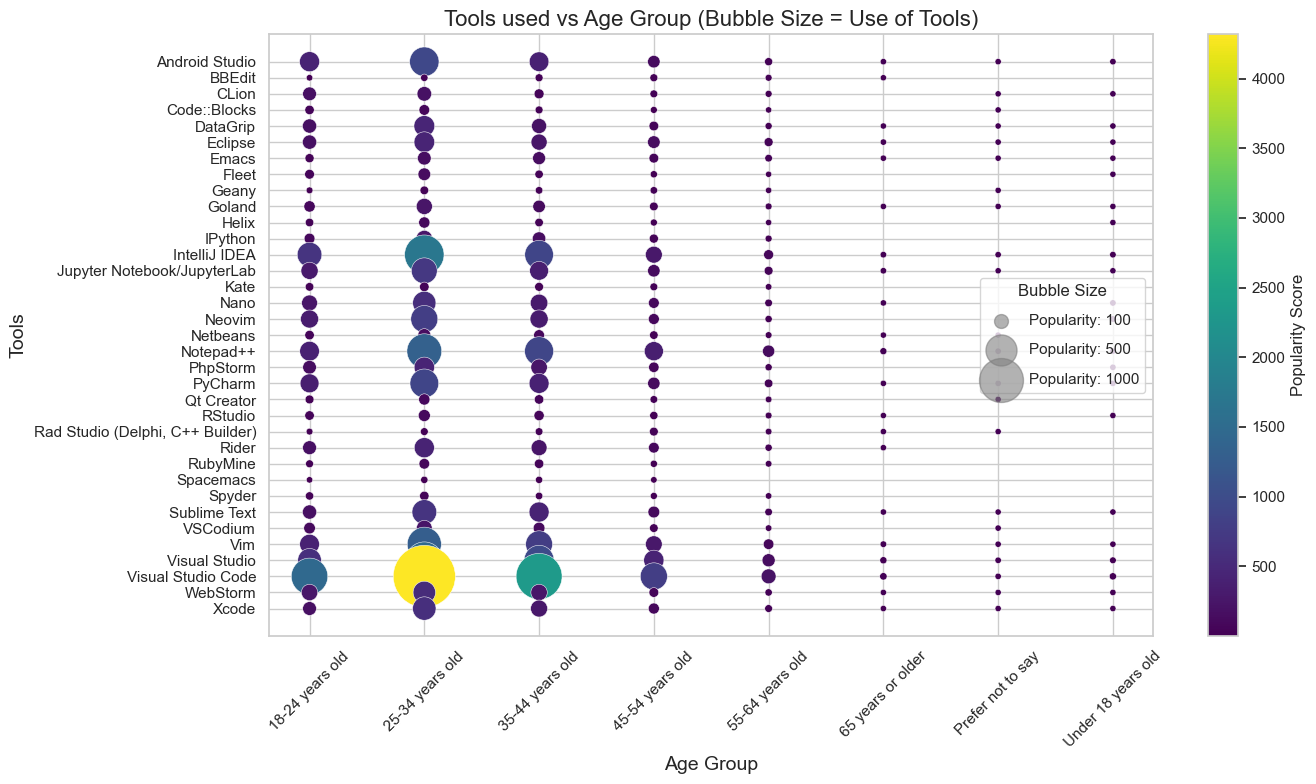

In [29]:
# Create bubble plot
fig, ax  = plt.subplots(figsize=(14, 8))
sns.scatterplot(
    data=tools_counts,
    x='Age',
    y='NEWCollabToolsHaveWorkedWith',
    size='Count',
    sizes=(20, 2000),
    hue='Count',
    legend=False,
    palette='viridis',ax=ax
)

# Bubble size legend
for size in [100, 500, 1000]:
    ax.scatter([], [], s=size, c='gray', alpha=0.6, label=f'Popularity: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size')

# Colorbar for hue
norm = plt.Normalize(tools_counts['Count'].min(), tools_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Popularity Score')

plt.title('Tools used vs Age Group (Bubble Size = Use of Tools)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Tools', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [27]:
##Write your code here
df = df.dropna(subset=['WebframeWantToWorkWith'])

# explode
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].str.split(';')
df_exploded = df.explode('WebframeWantToWorkWith')

# Group by Age and Language and count occurrences
webframe_counts = df_exploded.groupby(['JobSat', 'WebframeWantToWorkWith']).size().reset_index(name='Count')



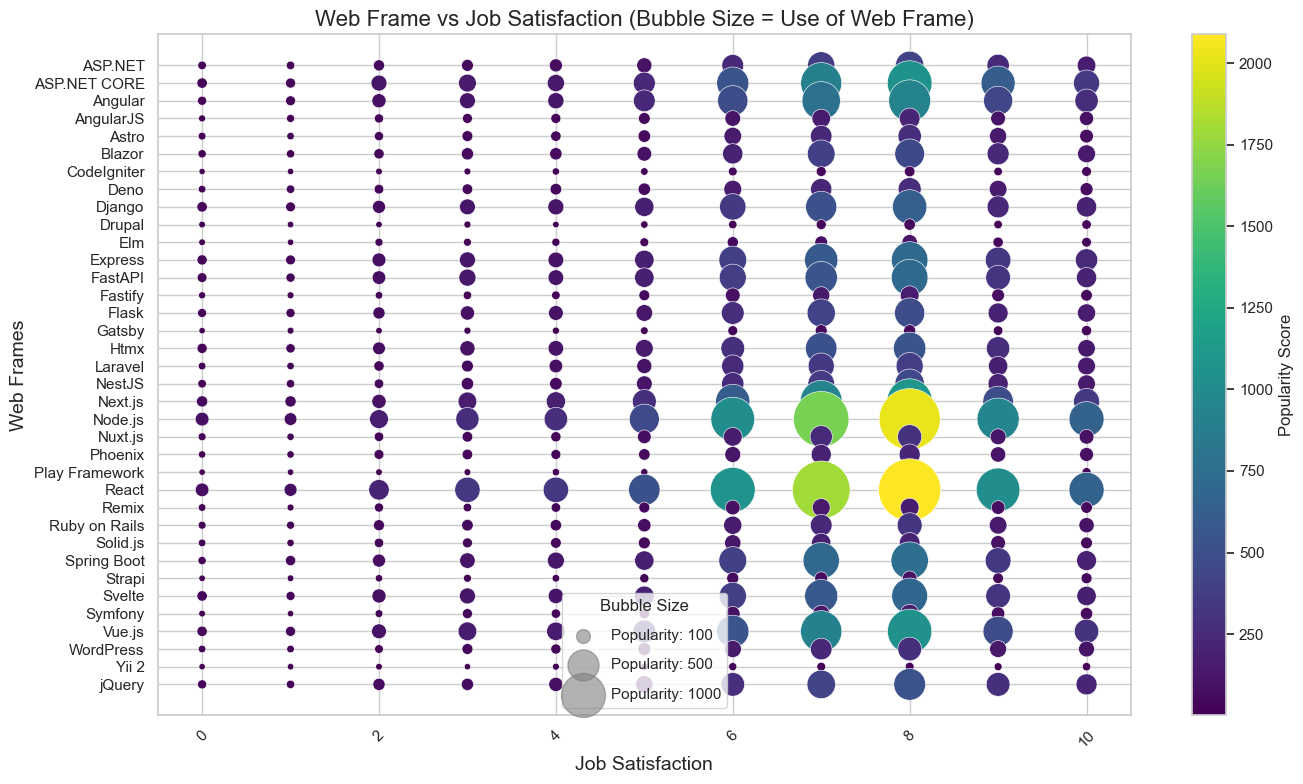

In [28]:
# Create bubble plot
fig, ax  = plt.subplots(figsize=(14, 8))
sns.scatterplot(
    data=webframe_counts,
    x='JobSat',
    y='WebframeWantToWorkWith',
    size='Count',
    sizes=(20, 2000),
    hue='Count',
    legend=False,
    palette='viridis',ax=ax
)

# Bubble size legend
for size in [100, 500, 1000]:
    ax.scatter([], [], s=size, c='gray', alpha=0.6, label=f'Popularity: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size')

# Colorbar for hue
norm = plt.Normalize(webframe_counts['Count'].min(), webframe_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Popularity Score')

plt.title('Web Frame vs Job Satisfaction (Bubble Size = Use of Web Frame)', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Web Frames', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [30]:
##Write your code here

df = df.dropna(subset=['LanguageAdmired', 'Country'])

# Explode the LanguageHaveWorkedWith column to separate multiple languages per respondent
df['LanguageAdmired'] = df['LanguageAdmired'].str.split(';')
df_exploded = df.explode('LanguageAdmired')

# Group by Age and Language and count occurrences
country_counts = df_exploded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Count')


C:\Users\HP\AppData\Local\Temp\ipykernel_8904\3692691451.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


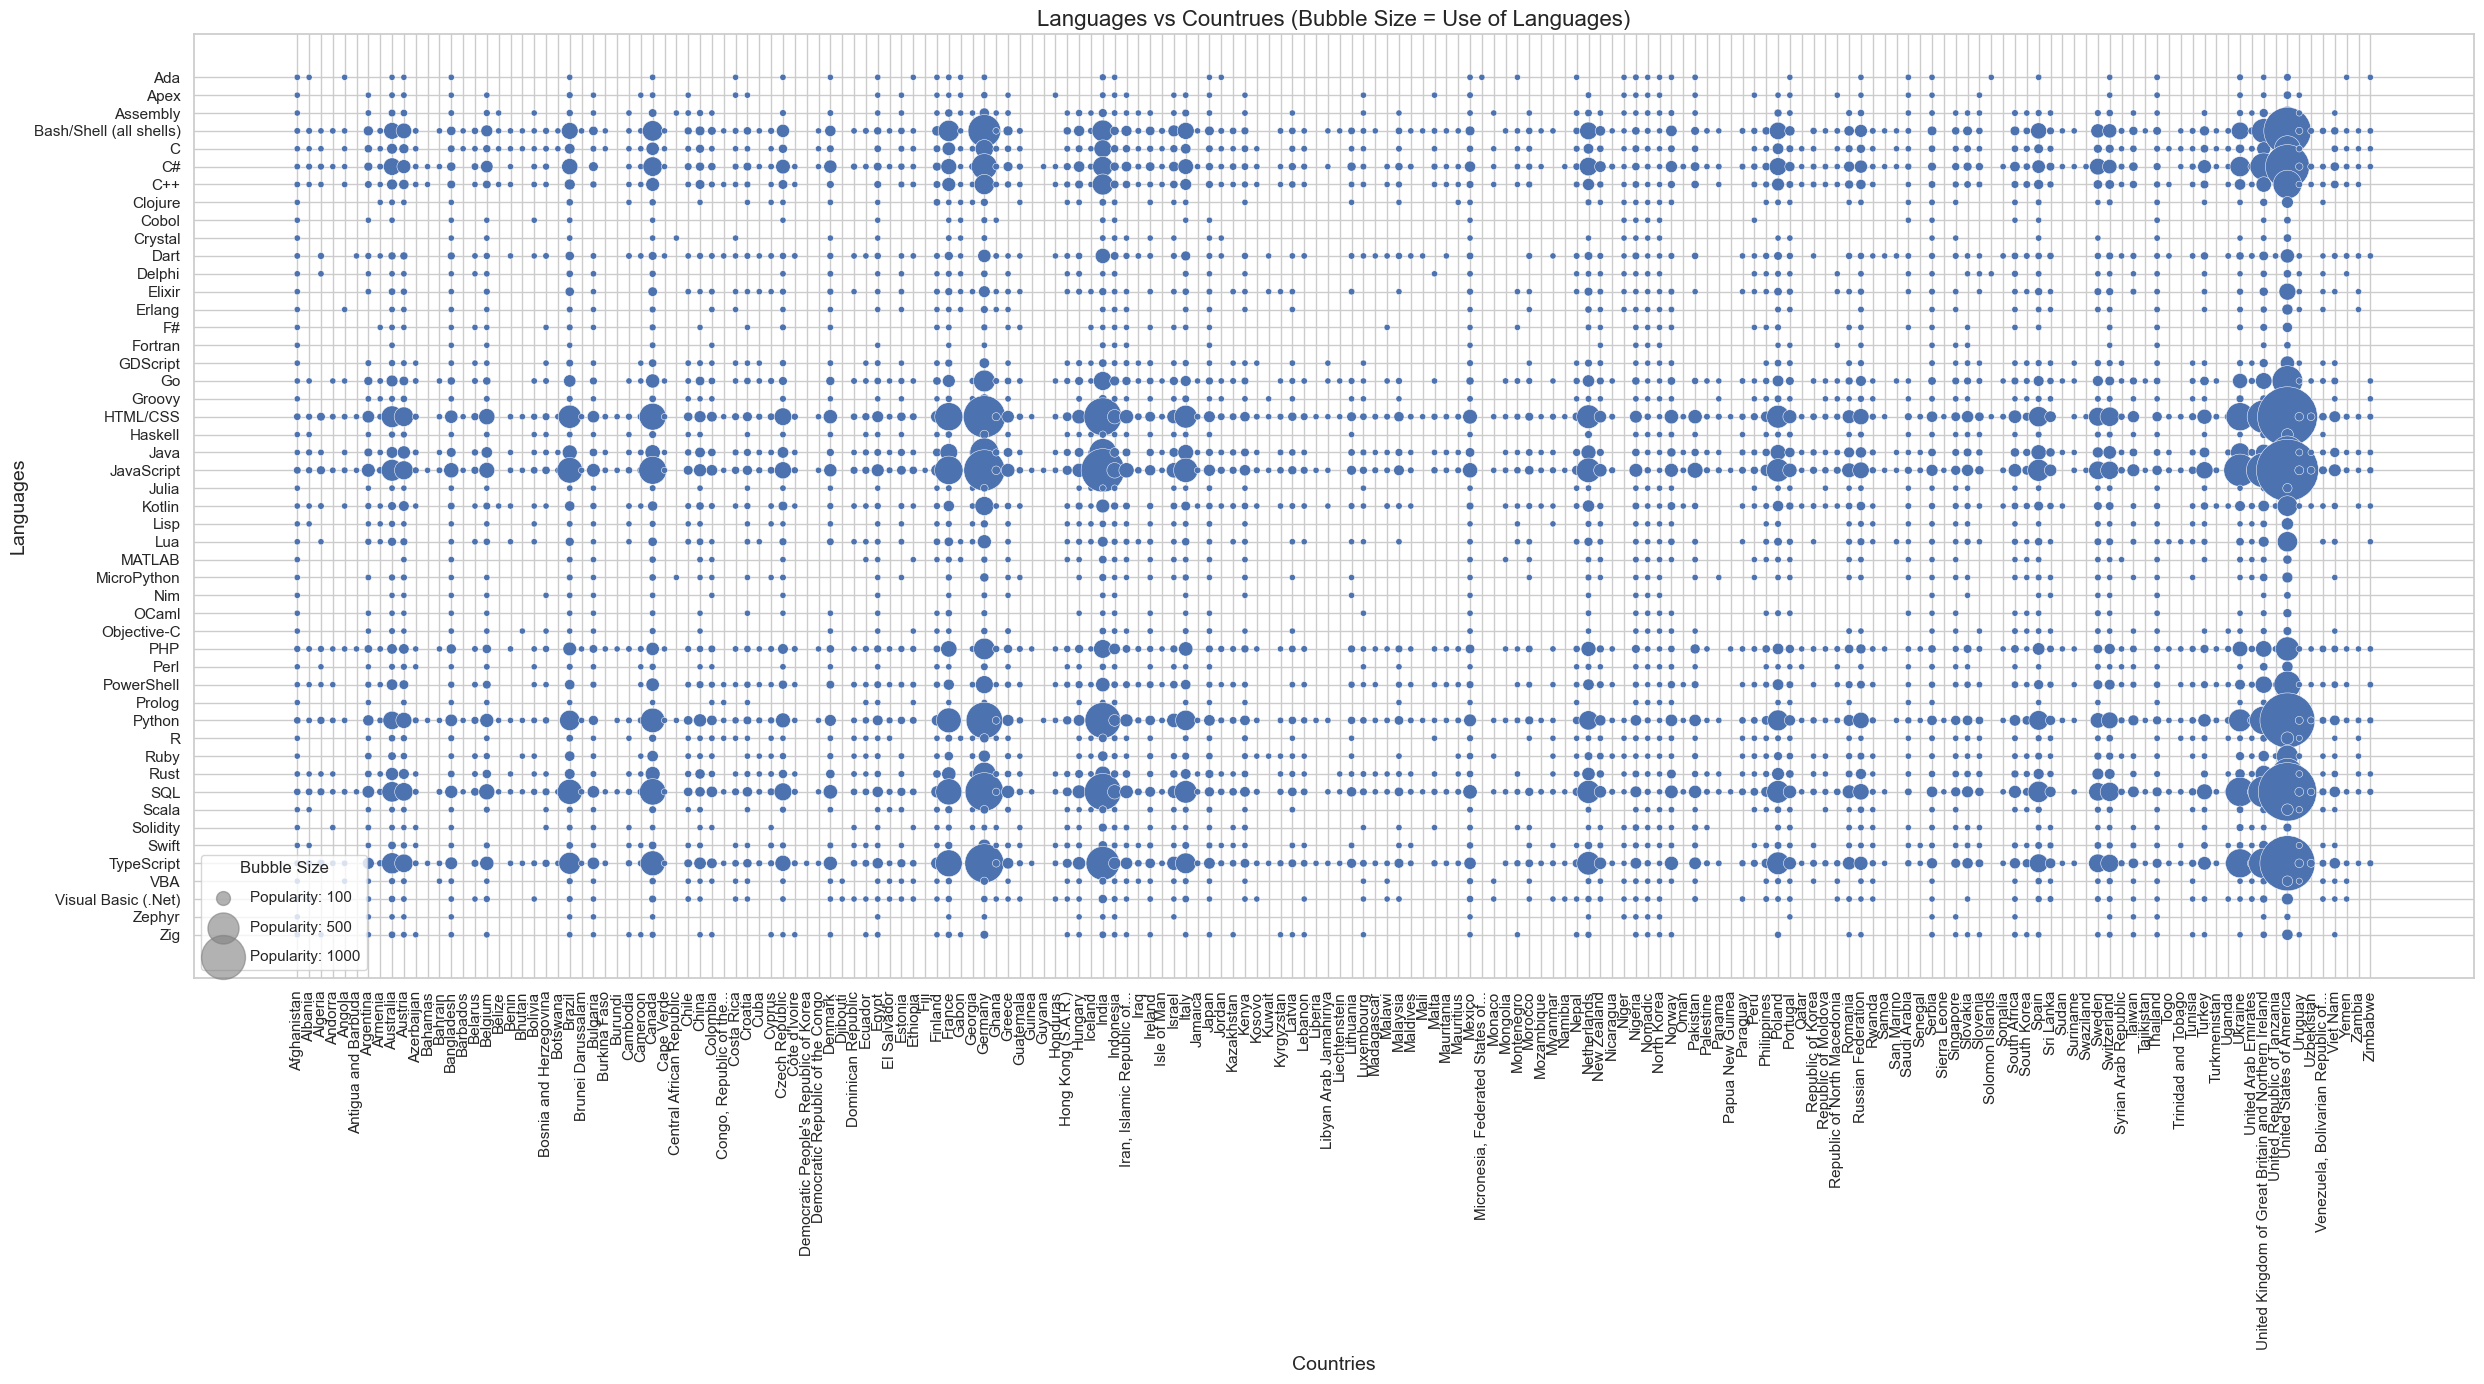

In [31]:
# Create bubble plot
fig, ax  = plt.subplots(figsize=(25, 14))
sns.scatterplot(
    data=country_counts,
    x='Country',
    y='LanguageAdmired',
    size='Count',
    sizes=(20, 2000),
    legend=False,
    palette='viridis',ax=ax
)

# Bubble size legend
for size in [100, 500, 1000]:
    ax.scatter([], [], s=size, c='gray', alpha=0.6, label=f'Popularity: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size')

plt.title('Languages vs Countrues (Bubble Size = Use of Languages)', fontsize=16)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Languages', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
